## Hello!
**This is my little machine.** <br>
<font color=pink>Its task is to match CVs/resumes to job/project description according to the degree of suitability.</font> <br>
<br>
[Author: Michael Christian Suhendra](https://www.youtube.com/watch?v=dQw4w9WgXcQ "Michael Christian Suhendra") <br>


In [1]:
%reload_ext watermark

%watermark -a 'MichaelSuhendra' -d -t -m -v -p numpy,pandas,scikit-learn,keras

Using TensorFlow backend.


MichaelSuhendra 2019-10-18 18:41:53 

CPython 3.7.4
IPython 7.8.0

numpy 1.16.5
pandas 0.25.1
sklearn 0.0
keras 2.3.1

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 58 Stepping 9, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [2]:
# prerequisites
import nltk
try:
     nltk.data.find('corpora/stopwords')
except LookupError:
     nltk.download()

[Link to download GloVe pre-trained word vectors](http://nlp.stanford.edu/data/glove.6B.zip "Link to download GloVe pre-trained word vectors")

In [3]:
import pandas as pd
import numpy as np

# Pandas options
pd.options.display.max_columns = 30
pd.options.display.max_rows = 20

from IPython import get_ipython
ipython = get_ipython()

# If in ipython, load autoreload extension
if 'ipython' in globals():
    print('\nWelcome to IPython!')
    ipython.magic('load_ext autoreload')
    ipython.magic('autoreload 2')

# Display all cell outputs in notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Visualization
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='pearl')

print('Your favorite libraries have been loaded.')


Welcome to IPython!


Your favorite libraries have been loaded.


***
### ◐ Data collection <br>

The data generator reads a .csv file as mapping, containing the file name 
of the CV, the file name of the job post, and the corresponding label, 
and populates an array for both CV/job post pair and label respectively.

Returns a numpy array with CV/job post pair (x) 
and a numpy array with labels (y).

In [4]:
import numpy as np
import os
import csv

# reads a .txt file and returns the text body
def read_file(folder, file):
    data = ''
    if os.path.isfile(os.path.join(folder, file + '.txt')):
        filename = os.path.join(folder, file)
        with open(filename + '.txt', 'r', encoding='utf8') as file:
            data = file.read().replace('\n', ' ')
    return data
    
# create array with .csv file for mapping as input
# TODO something on imbalanced classes
# this transforms the entire input data into an array
# should this be stored somewhere?
def generate_data(filename):
    pairs = []
    labels = []
    
    with open(filename, 'rt') as csvDataFile:
        csvReader = csv.reader(csvDataFile)
        next(csvReader)
        for row in csvReader:
            cv_text = read_file('cv/', row[0])
            jobpost_text = read_file('jobpost/', row[1])
            
            pairs += [[cv_text, jobpost_text]]
            labels.append(int(row[2]))
    
    return np.array(pairs), np.transpose(labels)

# returns the average word length in an array of texts
def get_average_text_length(texts):   
    return round(sum(len(i) for i in texts) / len(texts),1)

pairs, labels = generate_data('data.csv')

# print the first 5 pairs/labels
print(pairs[:5])
print(labels[:5])

# print the average length of documents
print('Average CV length: ', get_average_text_length(pairs[:,0]))
print('Average job post length: ', get_average_text_length(pairs[:,1]))

[['Senior Java/JEE Developer, Software Architect gulp_id_picture Kontaktieren Auf die Merkliste verfügbar ab 02.12.2019 verfügbar zu 100 % davon vor Ort 60 % PLZ-Gebiet, Land D2D3D4D5 Städte Hannover 200 km Kontaktwunsch Ich möchte bevorzugt für Projekte in diesen Einsatzorten kontaktiert werden.  Projekte 04/2019 - 11/2019  8 Monate  Integration PLM-Lösungen mit Spring Cloud DataFlow  01/2018 - 03/2019  1 Jahr 3 Monate  Migration des Buchungsclients von Swing auf Single-Page-Webapplication  07/2017 - 12/2018  1 Jahr 6 Monate  Implementierung Risikosteuerung  11/2016 - 06/2017  8 Monate  Umstellung Reise-Buchungsclient von Swing auf Angular / SpringBoot  05/2014 - 10/2016  2 Jahre 6 Monate  Implementierung Verhandlungs- und Konditionsmanagement  09/2012 - 04/2014  1 Jahr 8 Monate  Implementierung einer Integration zum Abgleich von Stücklisten  01/2011 - 08/2012  1 Jahr 8 Monate  Implementierung E-Mail Kampagnen-Plattform zur Online-Leadgewinnung  Branchen Touristik Airline Handel Autom

### ◑ Text preprocessing <br> 
This module gets raw text as input,
'cleans' the text
and returns the vector representation of words in the text.

In [5]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stop_words = set(stopwords.words('german'))|set(stopwords.words('english'))
germanStemmer = SnowballStemmer('german', ignore_stopwords = True)

def cleanup_text(text):
    # remove punctuation and replace with whitespace
    #text = ' '.join(text.translate(str.maketrans('','',string.punctuation)).split())
    text = text.translate(str.maketrans('','',string.punctuation))
    # stemming
    text = ' '.join(germanStemmer.stem(word) for word in text.split())
    # remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # remove extra spaces
    text = ' '.join(text.split())
    # lowercase
    return text.lower()

## Returns words as tokens (an array, with unique words as columns)
#def tokenize(text):
#    tokens = word_tokenize(text)
#    for w in tokens:
#        w = lemmatize(w)
#    result = [i for i in tokens if not i in stop_words]
#    return result

## Returns words in base form (stemming)
#def lemmatize(text):
#    text = germanStemmer.stem(text)
#    return text

for p in pairs:
    p[0] = cleanup_text(p[0])
    p[1] = cleanup_text(p[1])
    
# print the first 5 pairs/labels
print(pairs[:5])
print(labels[:5])

# print the average length of documents
print('Average CV length: ', get_average_text_length(pairs[:,0]))
print('Average job post length: ', get_average_text_length(pairs[:,1]))

# print the array shape
print(pairs.shape)
print(labels.shape)

[['senior javaje develop softwar architect gulpidpictur kontakti merklist verfugbar ab 02122019 verfugbar 100 davon ort 60 plzgebiet land d2d3d4d5 stadt hannov 200 km kontaktwunsch mocht bevorzugt projekt einsatzort kontaktiert projekt 042019 112019 8 monat integration plmlosung spring cloud dataflow 012018 032019 1 jahr 3 monat migration buchungsclient swing singlepagewebapplication 072017 122018 1 jahr 6 monat implementier risikosteuer 112016 062017 8 monat umstell reisebuchungsclient swing angular springboot 052014 102016 2 jahr 6 monat implementier verhandl konditionsmanagement 092012 042014 1 jahr 8 monat implementier integration abgleich stucklist 012011 082012 1 jahr 8 monat implementier email kampagnenplattform onlineleadgewinn branch tourist airlin handel automotiv onlinemarketing kompetenz programmiersprach angular java hervorrag java java ee java 10 java 11 java 6 java 8 java 9 javae javascript jaxws jms jpa jsf plsql shell xtend betriebssystem linux windows datenbank jdbc m

### ◐ Preparing train and test set <br>
The entire prepared dataset is split into train and test data. <br>To ensure a fair experiment, the sets are generated once and will be used for all models/algorithms below. In other words, the contents of the train and test data are the same for all models. <br> However, when the cell is restarted, the entire dataset will be split differently.

In [6]:
EPOCHS = 15
TEST_SPLIT = 0.25
LABELS = np.array([1,2,3,4,5])

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pairs, labels, test_size=TEST_SPLIT, random_state=42)

# TODO k-fold?

### Helper methods for data analysis

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# copied from documentation

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def model_classification_report(y_true, y_pred, labels):
    return classification_report(y_true, y_pred, labels=labels)


### Helper methods for evaluation

In [9]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)


def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

In [10]:
# neural network libraries
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense, Dropout, Lambda, Conv1D, MaxPooling1D, Embedding, concatenate
from keras.optimizers import RMSprop
from keras.initializers import Constant
from keras import backend as K

### The bag of words method

(1155, 6378)
(1155, 6378)
(1155, 1)


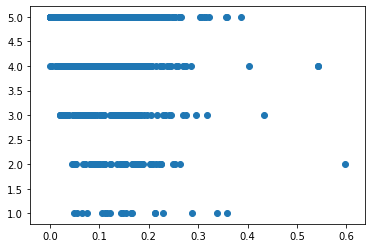

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        62
           5       0.71      1.00      0.83       273

    accuracy                           0.71       385
   macro avg       0.14      0.20      0.17       385
weighted avg       0.50      0.71      0.59       385

Confusion matrix, without normalization
[[  0   0   0   0  12]
 [  0   0   0   0  13]
 [  0   0   0   0  25]
 [  0   0   0   0  62]
 [  0   0   0   0 273]]


c:\users\user\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



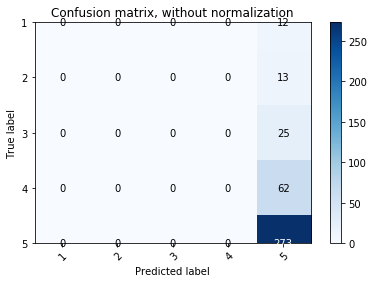

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

cvec = CountVectorizer()
similarity = []

vector = cvec.fit_transform(x_train.ravel()).toarray()
cv_vector = cvec.transform(x_train[:,0])
job_vector = cvec.transform(x_train[:,1])

print(cv_vector.shape)
print(job_vector.shape)

# calculate cosine similarity
for i in range(x_train.shape[0]):
    similarity.append(cosine_similarity(cv_vector[i,:], job_vector[i,:])[0][0])

similarity = np.array(similarity).reshape(-1,1)
print(similarity.shape)

# visualise data
plt.scatter(similarity, y_train)
plt.show()

# train model
model = MultinomialNB().fit(similarity, y_train)

#test
similarity_test = []
cv_vector_test = cvec.transform(x_test[:,0])
job_vector_test = cvec.transform(x_test[:,1])

# calculate cosine similarity
for i in range(x_test.shape[0]):
    similarity_test.append(cosine_similarity(cv_vector_test[i,:], job_vector_test[i,:])[0][0])

similarity_test = np.array(similarity_test).reshape(-1,1)

# evaluate
y_pred = model.predict(similarity_test)
# print evaluation measures
print(model_classification_report(y_test, y_pred, LABELS))
plot_confusion_matrix(y_test, y_pred, LABELS)



,label,s1,s2
0,5.00,A plane is taking off.,An air plane is taking off.
1,3.80,A man is playing a large flute.,A man is playing a flute.
2,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,2.60,Three men are playing chess.,Two men are playing chess.
4,4.25,A man is playing the cello.,A man seated is playing the cello.


,label,s1,s2
0,2.5,A girl is styling her hair.,A girl is brushing her hair.
1,3.6,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.
2,5.0,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.
3,4.2,A man is cutting up a cucumber.,A man is slicing a cucumber.
4,1.5,A man is playing a harp.,A man is playing a keyboard.


Training size is (5711, 3)
Test size is (1379, 3)
Training size is (1155, 2)
Test size is (385, 2)


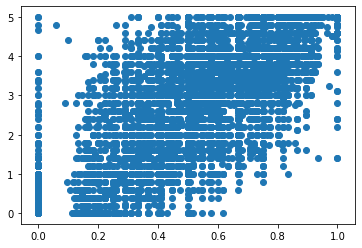

Mean squared error: 1.36
Variance score: 0.42


In [12]:
# test on STS dataset
# note that unlike the previous dataset, the label for this set is continuous in the range [0-5]
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

STS_COLUMNS = ['label','s1','s2']

# read data
sts_train = pd.read_csv('data/sts-train.csv',sep='\t',usecols=[i for i in range(4,7)],names=STS_COLUMNS)
sts_test = pd.read_csv('data/sts-test.csv',sep='\t',usecols=[i for i in range(4,7)],quoting=csv.QUOTE_NONE,names=STS_COLUMNS)

sts_train.head()
sts_test.head()

print('Training size is', sts_train.shape)
print('Test size is', sts_test.shape)

# drop rows with nan values
sts_train = sts_train.dropna(axis=0,how='any')
sts_test = sts_test.dropna(axis=0,how='any')

print('Training size is', x_train.shape)
print('Test size is', x_test.shape)

# train model
similarity = []
x_train = sts_train.to_numpy()
y_train = x_train[:,0]

# cleanup text
for x in x_train:
    x[1] = cleanup_text(x[1])
    x[2] = cleanup_text(x[2])

# learn vocabulary
cvec1 = CountVectorizer()
vector = cvec1.fit_transform((x_train[:,[1,2]].ravel()).astype('U'))
s1_vector = cvec1.transform(x_train[:,1])
s2_vector = cvec1.transform(x_train[:,2])

# calculate cosine similarity for each pair (not pairwise!)
for i in range(x_train.shape[0]):
    similarity.append(cosine_similarity(s1_vector[i,:], s2_vector[i,:])[0][0])
    
similarity = np.array(similarity).reshape(-1,1)

# visualise data
plt.scatter(similarity, y_train)
plt.show()

# fit model
stsmodel = LinearRegression().fit(similarity, y_train)

# test
similarity_test = []
x_test = sts_test.to_numpy()
y_test = x_test[:,0]

# cleanup text
for x in x_test:
    x[1] = cleanup_text(x[1])
    x[2] = cleanup_text(x[2])

s1_vector_test = cvec1.transform(x_test[:,1])
s2_vector_test = cvec1.transform(x_test[:,2])

# calculate cosine similarity for each pair (not pairwise!)
for i in range(x_test.shape[0]):
    similarity_test.append(cosine_similarity(s1_vector_test[i,:], s2_vector_test[i,:])[0][0])

similarity_test = np.array(similarity_test).reshape(-1,1)

# evaluate
y_pred = stsmodel.predict(similarity_test)
# print evaluation measures (for continuous data)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


In [13]:


# # initiate the vectorizer object
# cvec1 = CountVectorizer()
# cvec2 = CountVectorizer()

# # the text will be tokenized inside the CountVectorizer anyway.
# cv_vector_bow = cvec1.fit_transform(x_train[:,0]).toarray()
# print(cv_vector_bow.shape)
# jobpost_vector_bow = cvec2.fit_transform(x_train[:,1]).toarray()
# print(jobpost_vector_bow.shape)

# # either using scikit FeatureUnion, or literally concatenate
# # now: literally concatenate
# # TODO train whole process?
# # TODO create separate method for entire model?

# merged_vector_bow = np.concatenate((cv_vector_bow, jobpost_vector_bow), axis=1)
# #jobpost_temp_vector_bow = np.zeros(cv_vector_bow.shape)
# #jobpost_temp_vector_bow[:jobpost_vector_bow.shape[0],:jobpost_vector_bow.shape[1]] = jobpost_vector_bow
# #merged_vector_bow = cosine_similarity(cv_vector_bow, jobpost_temp_vector_bow)
# print(merged_vector_bow.shape)

# clf = MultinomialNB().fit(merged_vector_bow, y_train)

# # evaluate with test data
# cv_vector_bow_test = cvec1.transform(x_test[:,0]).toarray()
# jobpost_vector_bow_test = cvec2.transform(x_test[:,1]).toarray()
# merged_vector_bow_test = np.concatenate((cv_vector_bow_test, jobpost_vector_bow_test), axis=1)
# #jobpost_temp_vector_bow = np.zeros(cv_vector_bow.shape)
# #jobpost_temp_vector_bow[:jobpost_vector_bow_test.shape[0],:jobpost_vector_bow_test.shape[1]] = jobpost_vector_bow_test
# #merged_vector_bow_test = cosine_similarity(cv_vector_bow_test, jobpost_temp_vector_bow)

# y_pred = clf.predict(merged_vector_bow_test)

# # print evaluation measures
# print(model_classification_report(y_test, y_pred, LABELS))
# plot_confusion_matrix(y_test, y_pred, LABELS)



In [14]:
# from sklearn.model_selection import cross_val_score, cross_val_predict

# accuracy = cross_val_score(MultinomialNB(), merged_vector_bow, y_train, cv=5)
# print('Average accuracy: ', np.mean(accuracy))
# print('Standard deviation: ', np.std(accuracy))

# y_pred_cross_val = cross_val_predict(clf, merged_vector_bow, y_train, cv=5)
# # print evaluation measures
# print(model_classification_report(y_train, y_pred_cross_val, LABELS))
# plot_confusion_matrix(y_train, y_pred_cross_val, LABELS)

### Tf-idf

In [15]:
# # initiate the vectorizer object
# tfvec1 = TfidfVectorizer()
# tfvec2 = TfidfVectorizer()

# # the text will be tokenized inside the CountVectorizer anyway.
# cv_vector_bow = tfvec1.fit_transform(x_train[:,0]).toarray()
# jobpost_vector_bow = tfvec2.fit_transform(x_train[:,1]).toarray()

# # either using scikit FeatureUnion, or literally concatenate
# # now: literally concatenate
# # TODO train whole process?
# # TODO create separate method for entire model?

# merged_vector_bow = np.concatenate((cv_vector_bow, jobpost_vector_bow), axis=1)
# print(merged_vector_bow.shape)

# clf = MultinomialNB().fit(merged_vector_bow, y_train)

# # evaluate with test data
# cv_vector_bow_test = tfvec1.transform(x_test[:,0]).toarray()
# jobpost_vector_bow_test = tfvec2.transform(x_test[:,1]).toarray()
# merged_vector_bow_test = np.concatenate((cv_vector_bow_test, jobpost_vector_bow_test), axis=1)

# y_pred = clf.predict(merged_vector_bow_test)

# # print evaluation measures
# print(model_classification_report(y_test, y_pred, LABELS))
# plot_confusion_matrix(y_test, y_pred, LABELS)

# accuracy = cross_val_score(MultinomialNB(), merged_vector_bow, y_train, cv=5)
# print('Average accuracy: ', np.mean(accuracy))
# print('Standard deviation: ', np.std(accuracy))


### GloVe

In [16]:
#TODO download better glove embedding (840B instead of 6B)
# This module loads pre-trained word embeddings (GloVe embeddings) into a frozen Keras embedding layer.
# This will be used to train a text classification model.

# copied from documentation

embeddings_index = {}
with open(os.path.join('', 'glove.6B.300d.txt'), encoding='utf8') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

print('GloVe data loaded')
print('Found %s word vectors.' % len(embeddings_index))

GloVe data loaded
Found 400000 word vectors.


In [17]:
print('Preparing embedding matrix.')

MAX_NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 1000
EMBEDDING_DIM = 300

# prepare embedding matrix
# TODO determine word_index: is the number of unique tokens

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(pairs[:,0])
sequences = tokenizer.texts_to_sequences(pairs[:,0])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

tokenizer2 = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer2.fit_on_texts(pairs[:,1])
sequences2 = tokenizer2.texts_to_sequences(pairs[:,1])

word_index2 = tokenizer2.word_index
print('Found %s unique tokens.' % len(word_index2))

num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
print('Number of words')
print(num_words)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# print embedding shape
print(embedding_layer.output_dim)

# TODO classification: a sequential model of two embeddings plus a merge/softmax with 5 categories. Maybe use FeatureUnion?
# TODO embedding + as inputs to CNN

Preparing embedding matrix.
Found 5107 unique tokens.
Found 2246 unique tokens.
Number of words
5108
300


### Feed-forward Neural Network

In [18]:
#TODO add softmax layer in the end with 5 categories
def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Flatten()(input)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    return Model(input, x)



### Siamese CNN

In [19]:
#TODO maximum length from embedding layer
def create_cnn_network(embedding_length):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(embedding_length, 1)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    return model

def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)




This is the main module of the project. <br>
The model can be chosen from the following:

    - Bag-of-Words
    - Tf-idf Vectorizer
    - Doc2Vec/GloVe
    - Feed-forward Neural Network
    - Convolutional Neural Network
    - Siamese Convolutional Neural Network
    
<br>
TODO create the models in separate files.

In [20]:
def __init__():
    print('init')

# General machine learning functions: fit the model and compute F-score.

